In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import pandas as pd

In [18]:
ρ = 5
n = 5e1
δ = 2e-1
c = 3e-1
k = 1e-4
m = 1e-1
α0 = 2e-1
κ = 2e-3
λE = 4e-2
λ = 1e-3
e = 9
ϵS = 0
f = 1
rS = 4e2
rL = 4e-2
tH = 2
tD = 1.5
Estar = 10
Vstar = 1e-2

In [19]:
def m1(y, t):
    # Here U is a vector such that y=U[0] and z=U[1]. This function should return [y', z']
    return [
        n*δ*y[2] - c*y[0] - f*k*y[3]*y[0],
        (1-ϵS)*(λE*(1 - y[1]/e))*y[1] + ρ*y[0],
        k*y[3]*y[0] - δ*y[2] - (1 - ϵS)*m*y[1]*y[2] + α0*y[4] - κ*y[2],
        λ*(1-y[3]/rS)*y[3] - k*y[3]*y[0],
        λ*(1-y[4]/rL)*y[4] - α0*y[4] + κ*y[4]
    ]        

In [20]:
y0 = [1e-2, 0, 0, 4e3, 0]
ts = np.linspace(0,1000, 100000)

In [21]:
ϵS = 0
ys0 = odeint(m1, y0, ts)
ϵS = 0.7
ys1 = odeint(m1, y0, ts)
ϵS = 0.99
ys2 = odeint(m1, y0, ts)

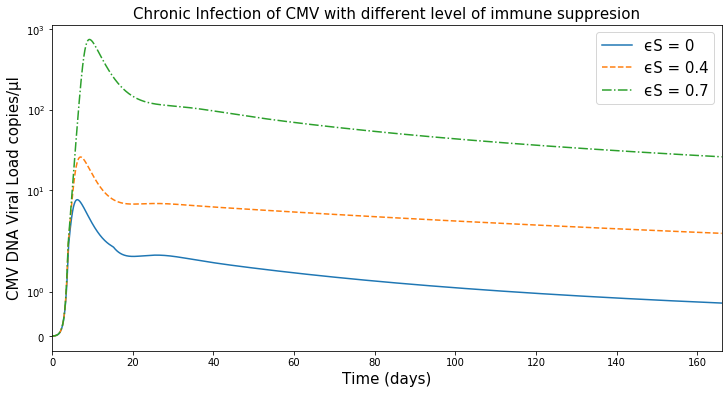

In [22]:
plt.figure(figsize=(12,6))
plt.plot(ts, ys0[:, 0], '-', label="ϵS = 0")
plt.plot(ts, ys1[:, 0], '--', label="ϵS = 0.4")
plt.plot(ts, ys2[:, 0], '-.', label="ϵS = 0.7")
plt.yscale('symlog')
plt.xlabel('Time (days)',fontsize=15)
plt.ylabel('CMV DNA Viral Load copies/μl',fontsize=15)
plt.xlim(xmin=0,xmax=166)
plt.legend(fontsize=15,loc=1)
plt.rc('axes', labelsize=15)
plt.title("Chronic Infection of CMV with different level of immune suppresion",fontsize=15)
#plt.gca().invert_xaxis()

pass

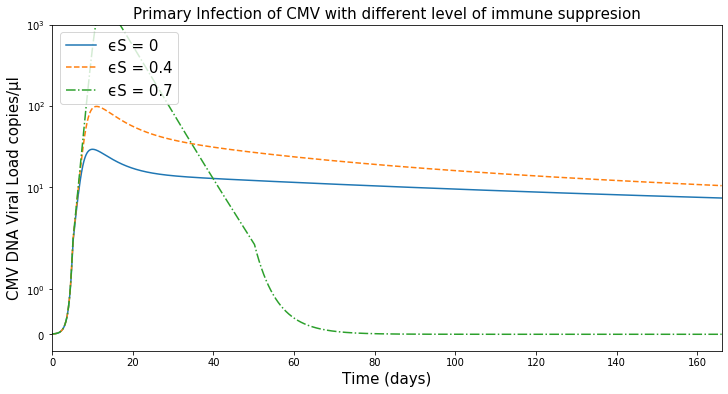

In [17]:
plt.figure(figsize=(12,6))
plt.yscale('symlog')
plt.plot(ts, ys0[:, 0], '-', label="ϵS = 0")
plt.plot(ts, ys1[:, 0], '--', label="ϵS = 0.4")
plt.plot(ts, ys2[:, 0], '-.', label="ϵS = 0.7")
plt.xlabel('Time (days)',fontsize=15)
plt.ylabel('CMV DNA Viral Load copies/μl',fontsize=15)
plt.xlim(xmin=0,xmax=166)
plt.legend(fontsize=15,loc=2)
plt.rc('axes', labelsize=15)
plt.title("Primary Infection of CMV with different level of immune suppresion",fontsize=15)
#plt.gca().invert_xaxis()
plt.ylim(ymax=1e3)
pass

In [126]:
ts3=ts+100

In [127]:
ts3[0]=1e-2

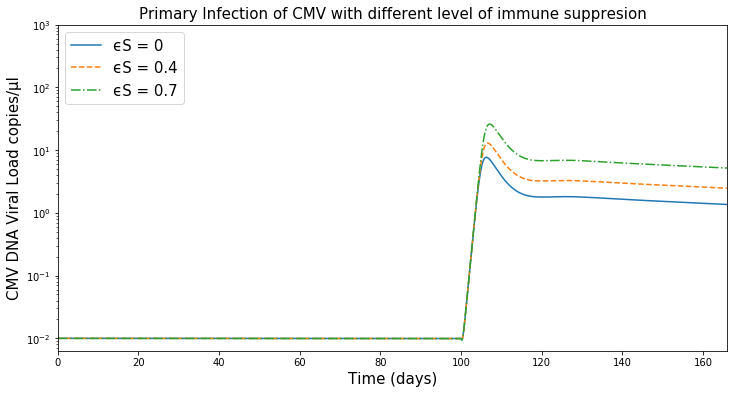

In [130]:
plt.figure(figsize=(12,6))
plt.yscale('log')
plt.plot(ts3, ys0[:, 0], '-', label="ϵS = 0")
plt.plot(ts3, ys1[:, 0], '--', label="ϵS = 0.4")
plt.plot(ts3, ys2[:, 0], '-.', label="ϵS = 0.7")
plt.xlabel('Time (days)',fontsize=15)
plt.ylabel('CMV DNA Viral Load copies/μl',fontsize=15)
plt.xlim(xmin=0,xmax=166)
plt.ylim(ymax=1000)
plt.legend(fontsize=15,loc=2)
plt.rc('axes', labelsize=15)
plt.ylim(ymax=1e3)
plt.title("Primary Infection of CMV with different level of immune suppresion",fontsize=15)
pass

In [12]:
pde=pd.read_csv(r'C:\Users\pc\Desktop\0.csv')
placenta_growth=10000/(1+ np.exp(-(0.05*(pde['0'].values-80))));

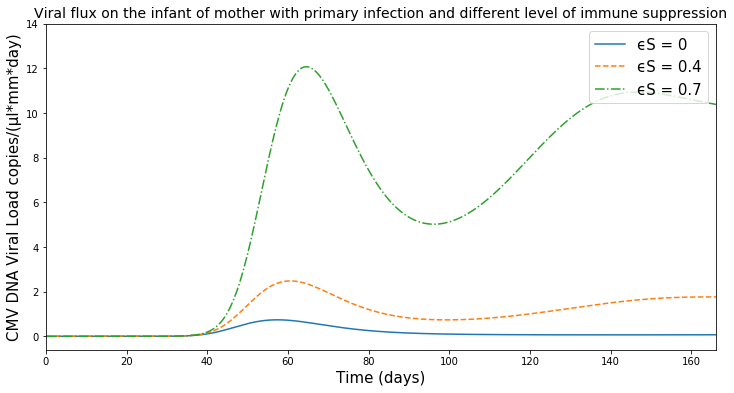

In [13]:
plt.figure(figsize=(12,6))
plt.plot(pde['0'],pde['0.1']*placenta_growth/28858   ,'-', label="ϵS = 0")
plt.plot(pde['0'],pde['0.2']*placenta_growth/28858,'--', label="ϵS = 0.4")
plt.plot(pde['0'],pde['0.3']*placenta_growth/28858,'-.', label="ϵS = 0.7")
#plt.yscale('symlog')
plt.xlabel('Time (days)',fontsize=15)
plt.title('Viral flux on the infant of mother with primary infection and different level of immune suppression',fontsize=14)
plt.ylabel('CMV DNA Viral Load copies/(μl*mm*day)',fontsize=15)
plt.xlim(xmin=0,xmax=166)
plt.legend(fontsize=15,loc=1)
plt.rc('axes', labelsize=15)
plt.ylim(ymax=14)
plt.show()